In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
names = ["official", "lisbon", "tokyo", "tour_1989"]
timings = [38.750, 20.190, 5.575, 18.870]    # Timing of the last beat before the singing starts
colors = ["dodgerblue", "orange", "green", "red"]

In [3]:
# Create output if it doesn't exist, if it exists, do nothing
if not os.path.exists("output"):
    os.mkdir("output")

for i,name in enumerate(names):
    os.system(f"ffmpeg -i data/{name}.mp3 -ss {timings[i]} -t 30 output/{name}.wav")
    os.system(f"spleeter separate output/{name}.wav -p spleeter:2stems -o output/")

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --

INFO:spleeter:File output/official/accompaniment.wav written succesfully
INFO:spleeter:File output/official/vocals.wav written succesfully


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --

INFO:spleeter:File output/lisbon/vocals.wav written succesfully
INFO:spleeter:File output/lisbon/accompaniment.wav written succesfully


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --

INFO:spleeter:File output/tokyo/vocals.wav written succesfully
INFO:spleeter:File output/tokyo/accompaniment.wav written succesfully


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --

INFO:spleeter:File output/tour_1989/vocals.wav written succesfully
INFO:spleeter:File output/tour_1989/accompaniment.wav written succesfully


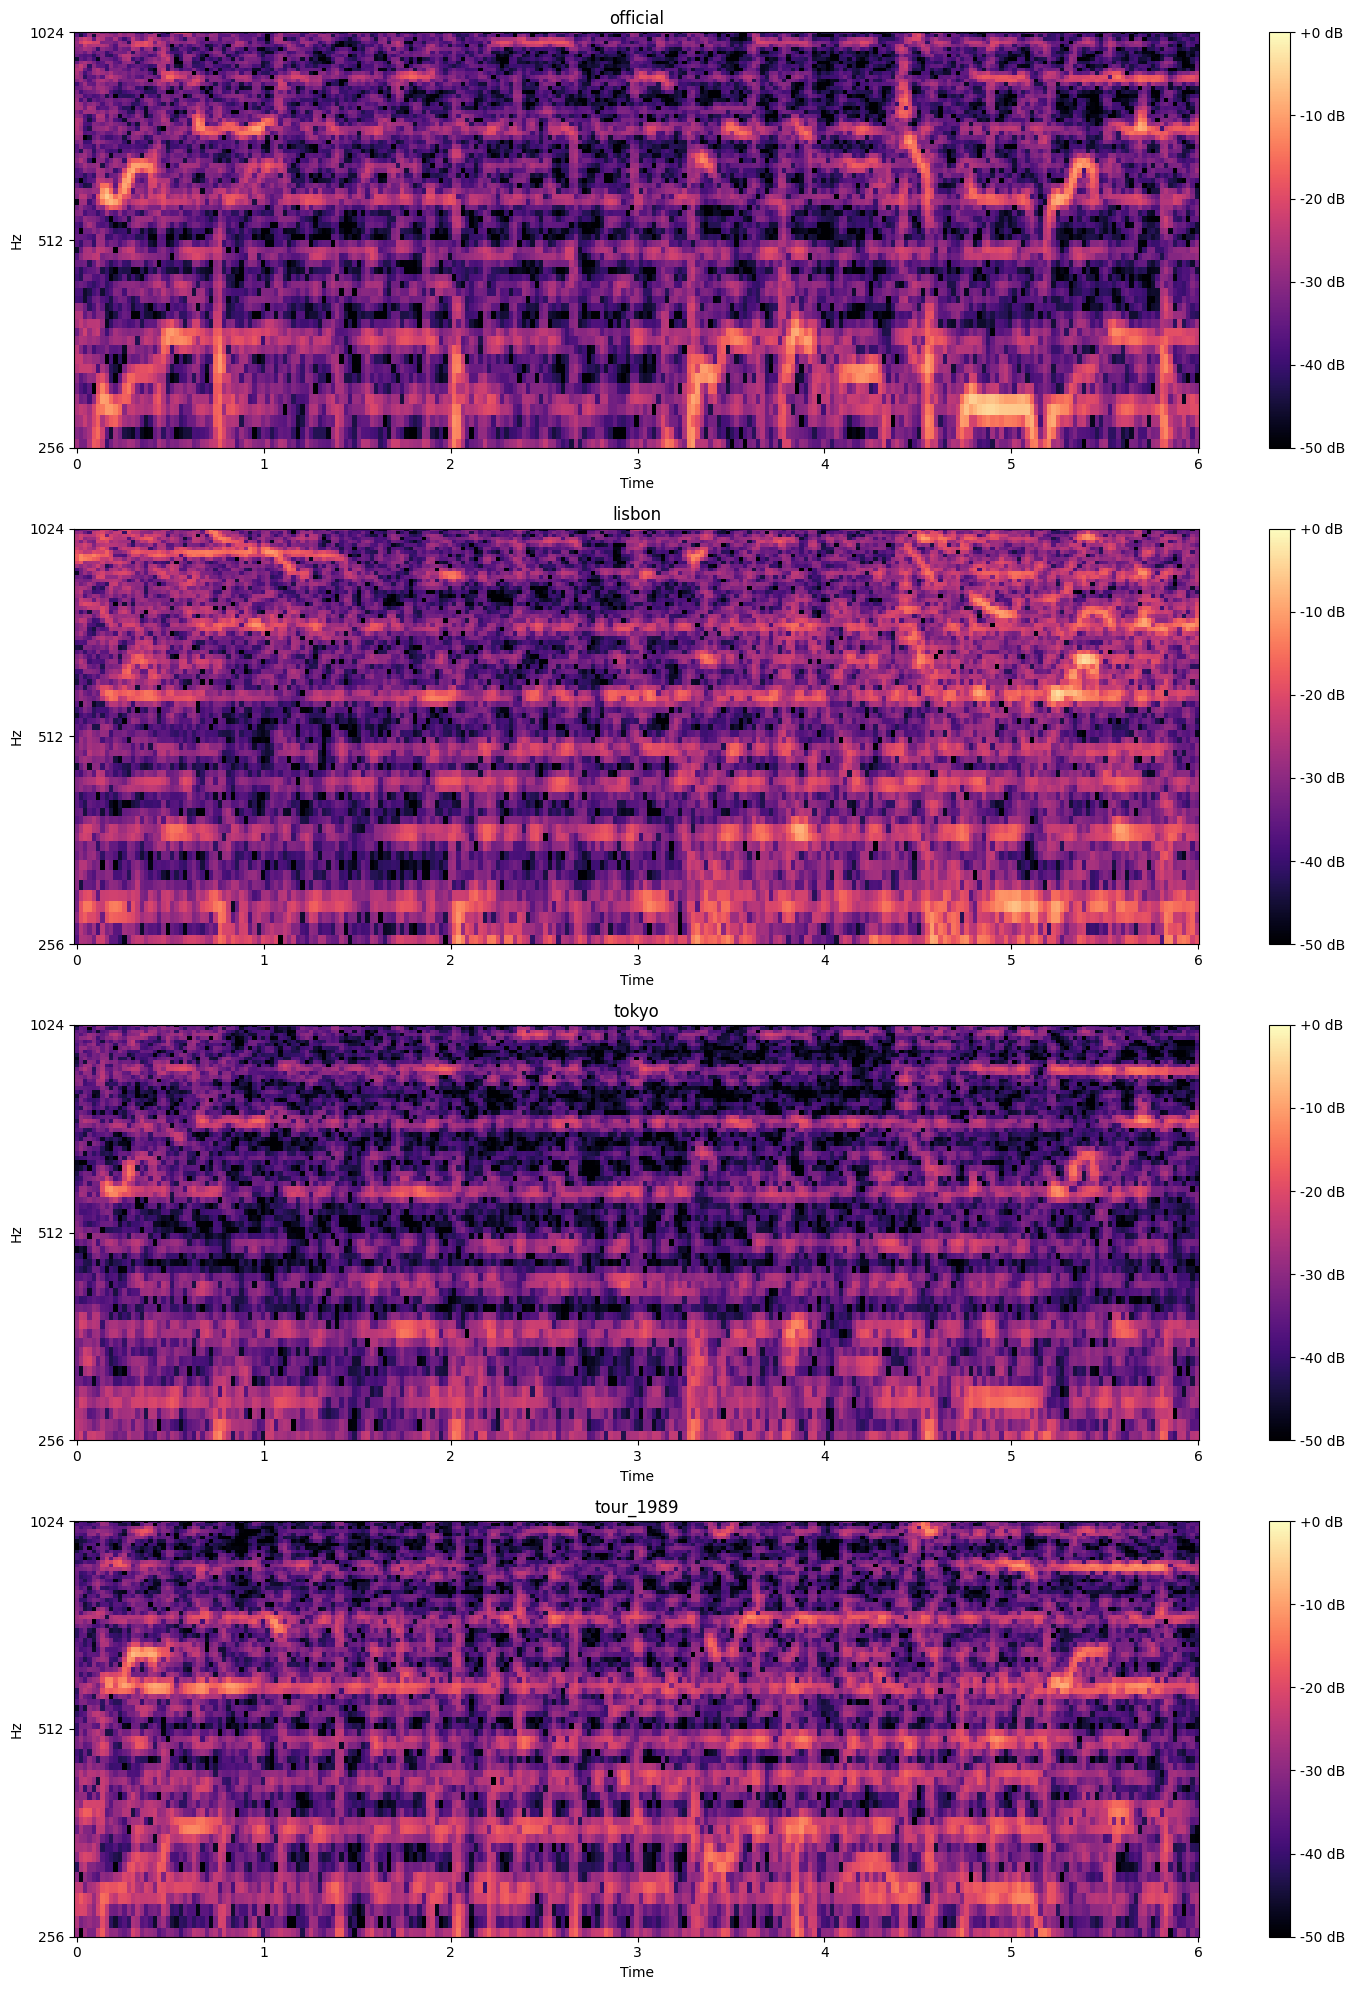

In [4]:
start_segment = 0.5
end_segment = 6.5
n_fft = 2048
plt.figure(figsize=(15, 20))
for i,name in enumerate(names):
    y, sr = librosa.load("output/" + name + ".wav", sr=22050)
    y = y[int(start_segment * sr):int(end_segment * sr)]
    y = y / np.max(np.abs(y))
    S = librosa.stft(y, n_fft=n_fft)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    plt.subplot(4,1,i+1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log',vmin = -50)
    plt.colorbar(format='%+2.0f dB')
    plt.title(name)
    plt.ylim(256,1024)
plt.tight_layout()
plt.savefig(f"output/spectrograms_{n_fft}.png")
plt.show()


In [5]:
# Compute and plot the volume envelope of each vocal track
volumes = []
for name in names:
    vocal_file_path = f"output/{name}/vocals.wav"
    y, sr = librosa.load(vocal_file_path, sr=22050)
    volume = librosa.feature.rms(y=y)
    volumes.append(volume[0])

# Smooth the volume envelope using a moving average
window_size = 20
for i in range(len(volumes)):
    volumes[i] = np.convolve(volumes[i], np.ones(window_size) / window_size, mode='same')

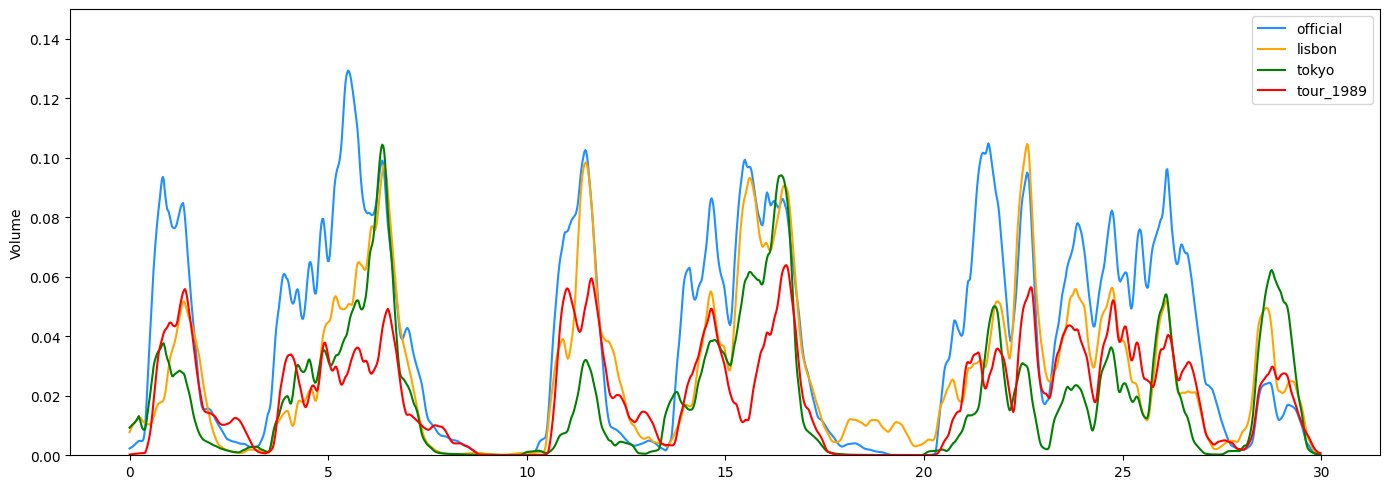

In [6]:
plt.figure(figsize=(14, 5))
plt.ylabel('Volume')
for i in range(len(names)):
    n_samples = len(volumes[i])
    plt.plot(np.arange(0,len(volumes[i]))/sr*512, volumes[i], label=f'{names[i]}', color=colors[i])
plt.ylim(0.0,0.15)
plt.legend()
plt.tight_layout()
plt.savefig("output/volume_envelopes.png")
plt.show()

In [7]:
times = []
pitches = []
frame_length = 2048
hop_length = frame_length // 2

for name in names:
    vocal_file_path = f"output/{name}/vocals.wav"
    y, sr = librosa.load(vocal_file_path, sr=22050)

    fmin = librosa.note_to_hz('C4')
    fmax = librosa.note_to_hz('C6')

    pitch, voiced_flag, voiced_probs = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr, frame_length=frame_length, hop_length=hop_length)

    time_axis = np.linspace(0, len(y) / sr, len(pitch))
    times.append(time_axis)
    pitches.append(pitch)

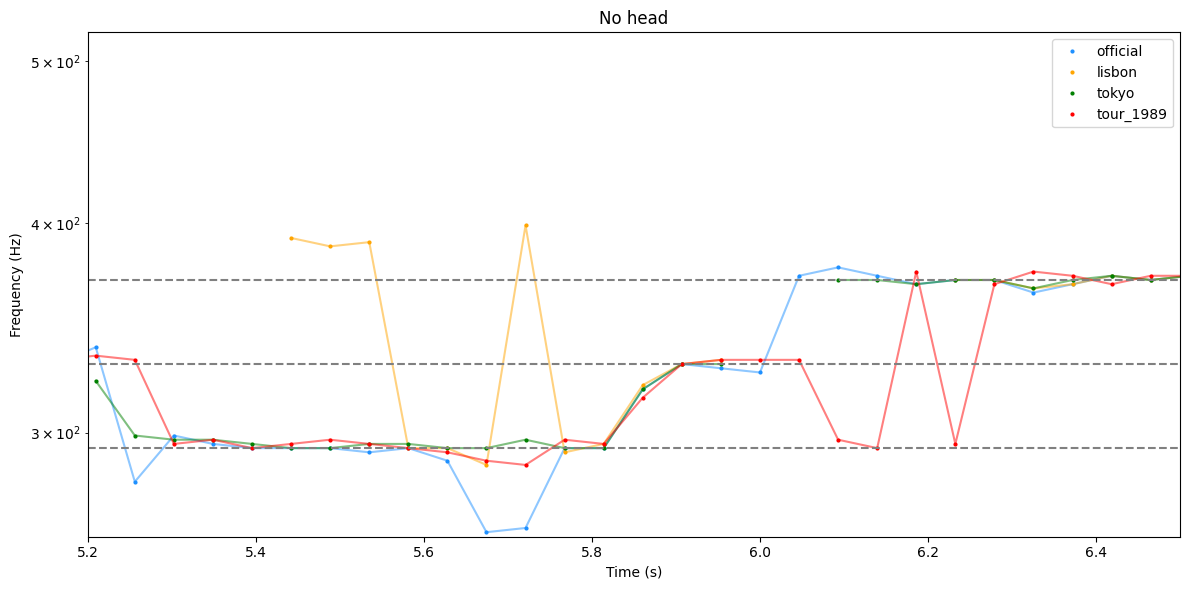

In [8]:
ranges = [(0,13), (5.2,6.5), (10.5,12), (3.5,4.5), (0.5, 3.0), (20,30)]
range_names = ["Full", "No head","Long drive", "You can", "Midnight", "Fin"]

index = 1

# Static plot of the pitches
plt.figure(figsize=(12, 6))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
for i in range(len(names)):
    plt.plot(times[i], pitches[i], label=f'{names[i]}', marker='o', markersize=2, color=colors[i], linestyle='None')
    plt.plot(times[i], pitches[i], color=colors[i], linestyle='-', alpha = 0.5)
plt.legend()
plt.xlim(ranges[index][0],ranges[index][1])
plt.ylim(260,520)
plt.title(range_names[index])
# Log scale on y-axis
plt.yscale('log')
# Draw a horizontal line at D4, E4, F#4
plt.axhline(y=293.66, color='gray', linestyle='--', label='D4')
plt.axhline(y=329.63, color='gray', linestyle='--', label='E4')
plt.axhline(y=369.99, color='gray', linestyle='--', label='F#4')
plt.tight_layout()
plt.savefig(f"output/pitches_{range_names[index]}_{frame_length}_{hop_length}.png")
plt.show()